<a href="https://colab.research.google.com/github/siwaritj/Cardiovascular-Disease-Awareness/blob/main/AdvComProg_DataScienceProject_Siwarit_Adam_Setthanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cardiovascular Disease Awareness

Siwarit Jarernvanich 6238207421

Adam Morgan 6238233721

Setthanan Leesuwan 6238226321

The main goal of this project is to raise awareness of heart disease by finding any trends in heart data to predict certain cardiovascular events or any clear indications of heart health.

This data was created by
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

and obtained from *kaggle.com* by the user **ronit** (created on 
2018-06-25)


### Section 1: Exploring our data

**age:** The person's age in years

**sex:** The person's sex (1 = male, 0 = female)

**cp:** The chest pain experienced (Value 0: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: typical angina)

**trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)

**chol:** The person's cholesterol measurement in mg/dl

**fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg:** Resting electrocardiographic measurement; This is a measurement of voltage over time of the electrical activity produced by the heart, using electropads. (Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria, Value 1: normal, Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))

**thalach:** The person's maximum heart rate achieved

**exang:** Exercise induced angina; A squeezing pain on the heart caused by reduced blood flow to the heart. (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest; The J point on the ECG graph is below the baseline. ('ST' relates to positions on the ECG plot)

**slope:** The slope of the peak exercise ST segment; This refers to the slow of the ST depression at the J point on the ECG. (0: downsloping; 1: flat; 2: upsloping)

**ca:** The number of major vessels

**thal:** A blood disorder called thalassemia; Thalassemia is inherited and causes an abnormality in the hemoglobin produced, or too little hemoglobin entirely. Red blood cells are not sustainable which leads to their elimination, causing anemia. (1 = fixed defect; 2 = normal; 3 = reversable defect)

**target:** Heart disease; Cardiovascular disease is when blood vessels in the heart are narrowed or blocked causing heart attack, angina or strokes. (0 = yes, 1 = no)

###Section 2: Data Representation

First, to make our project reliable and valid, we double-checked our data with the UCI Machine Learning Repository website (https://archive.ics.uci.edu/ml/datasets/heart+Disease). We came upon data #93, 159, 164, 165 and 252 that have ca = 4 which are incorrect. In the original Cleveland dataset they are NaNs. Furthurmore, data #49 and 282 have thal = 0, are also incorrect. They are also NaNs in the original dataset.

In order to represent our data on different kinds of graphs, we used pandas and converted our csv file into a dataframe.

In [ ]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Assuming we have no idea about the correlation or the trend at all, to get an idea if age or sex play any roles in any cardiovascular activities, we represented our data into bar graphs.

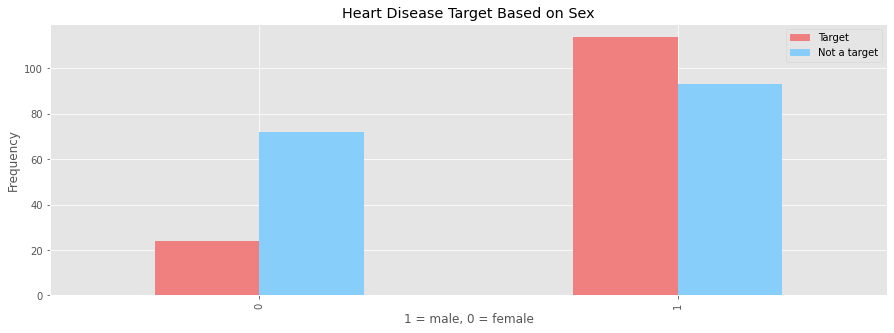

In [ ]:
pd.crosstab(df['sex'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.style.use('ggplot')
plt.title('Heart Disease Target Based on Sex')
plt.xlabel('1 = male, 0 = female')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

The female data, on the left half of the graph, shows there is a clear minority of females affected by heart disease of those inquired upon. On the other hand, a majority of the males in this investigation are affected by heart disease. While these drastic differences are alarming, and prove there is a correlation between sex affecting heart disease, there is still not enough information to conclusively say it's a causation relationship as well.

Another factor that could realistically have a causation and correlation relationship with heart disease is age. So that is what we investigated next.

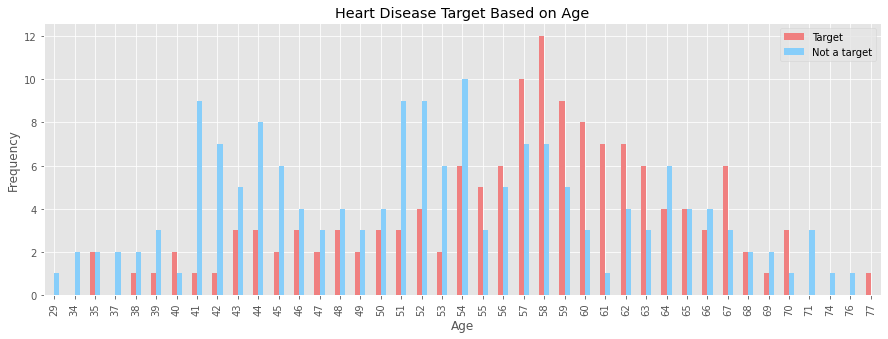

In [ ]:
pd.crosstab(df['age'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on Age')
plt.xlabel('Age')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

Keeping in mind the red bars indicate those affected by heart disease, there is a very prominent spike at 58 years old, with the frequency tapering for older and younger subjects. There is a relatively low frequency of subjects in the thirties and fourties affected by heart disease, but also there were less investigated compared to those in their fifties. Regardless, it is necessary to take into account the alarming majority of fifty year olds affected by heart disease, while those in their fourties are the minority.


###Section 3: Other Factors

Now we are going to explore what factors contributed to heart disease. Let's take a look at the chest pain experienced by each patients.

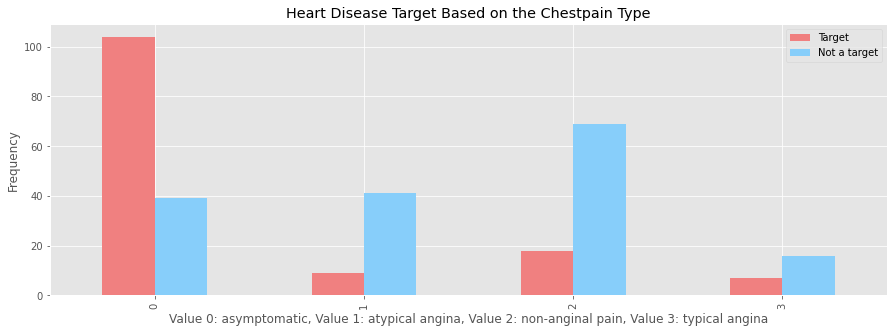

In [ ]:
pd.crosstab(df['cp'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on the Chestpain Type')
plt.xlabel('Value 0: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: typical angina')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

First, let's discuss angina. Typical angina meets all of the following three criteria: an internal chest pain, occurs after exertion or stress, can be treated by medicine or rest. For atypical angina, only two of the criteria met. Non-anginal pain is only one of the criteria. Asymptomatic means the patient experiences none of those symptoms. Oddly enough, of those that experienced any of the varieties of angina, a minority actually suffer from heart disease. Interestingly enough, a majority of aymptomatic patients tested suffer from heart disease. This seems counterintuitive but the conclusion is that, not suffering any type of angina does not mean one is risk free of heart disease.

Next, we wanted to show how the person's resting blood pressure contributed to the cardiovascular disease. By having distribution plots, we can observe the peak and compare between those who have the disease and those who does not.

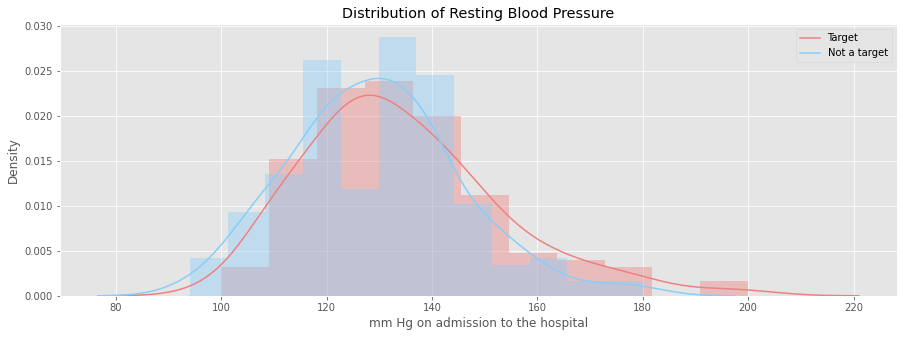

In [ ]:
import warnings
warnings.filterwarnings('ignore')

target_df = df[df.target == 0]
nontarget_df = df[df.target == 1]
plt.rcParams['figure.figsize'] = (15, 5)
sbs.distplot(target_df['trestbps'], color = 'lightcoral')
sbs.distplot(nontarget_df['trestbps'], color = 'lightskyblue')
plt.xlabel('mm Hg on admission to the hospital')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Density')
plt.title('Distribution of Resting Blood Pressure')
plt.show()

At first glance there is no notable difference between the two, however, it is evident there is a shift to the right of the targeted individuals. While the difference seems small, it is a matter of a few percent. Resting blood pressure wouldn't provide clear proof of heart disease, but high blood pressure could complement other pieces of data to create a thorough, definite decision.

Next, we do the same with the person's cholesterol measurement.

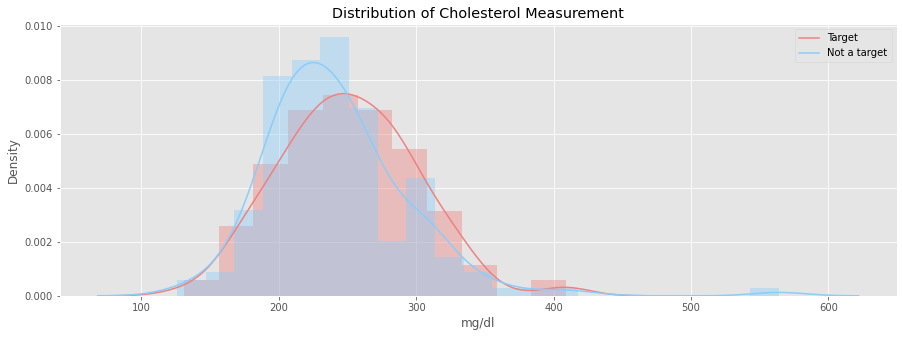

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sbs.distplot(target_df['chol'], color = 'lightcoral')
sbs.distplot(nontarget_df['chol'], color = 'lightskyblue')
plt.xlabel('mg/dl')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Density')
plt.title('Distribution of Cholesterol Measurement')
plt.show()

In contrast with resting blood pressure, cholesterol shows a more definitive difference between targeted and non-targeted individuals. The peak of non-targeted patients peaks at around 230mg/dl while for targeted individuals it is around 250mg/dl. Furthermore, the graph clearly shows a bell curve tending to higher cholestoral in those that suffer from heart disease.

Now, we are representing how the fasting blood sugar contributed to cardiovascular diseases by bar graph.

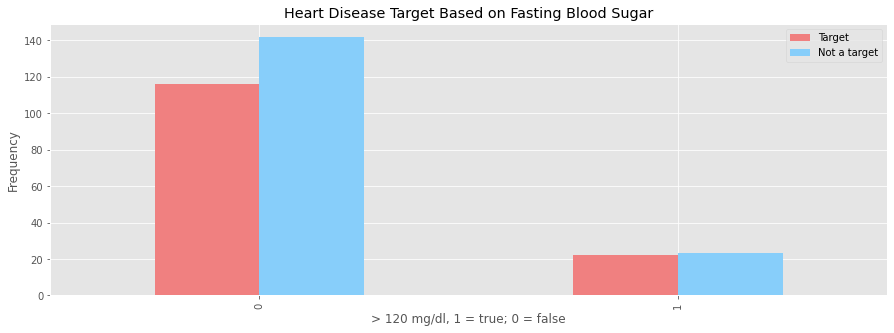

In [ ]:
pd.crosstab(df['fbs'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on Fasting Blood Sugar')
plt.xlabel('> 120 mg/dl, 1 = true; 0 = false')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

Initially, it seems as though haveing higher blood sugar levels (over 120mg/dl) overwhelmingly suggests you are at risk of heart disease, it must first be noted the number of patients in each. Of those above 120mg/dl around 46% (120 out of 260) suffered while its around 50% for those below 120mg/dl. This suggests that having a lower blood sugar level has a higher risk of suffering from heart disease, but the sample sizes may skew this. Regardless, the findings must be noted and taken into consideration for later in the analysis.

Similarly, we do the same with the person's resting electrocardiographic measurement.

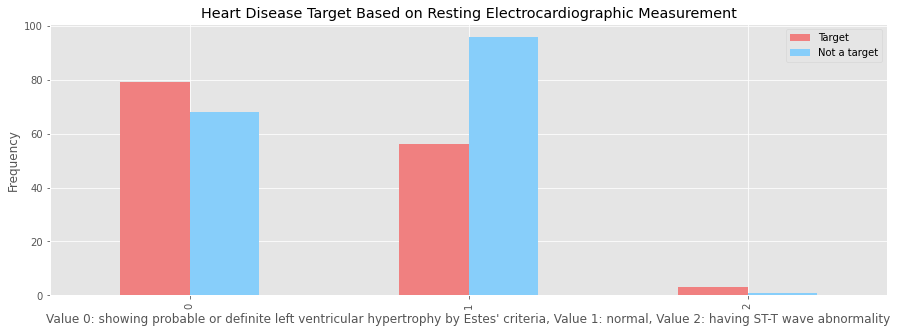

In [ ]:
pd.crosstab(df['restecg'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on Resting Electrocardiographic Measurement')
plt.xlabel("Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria, Value 1: normal, Value 2: having ST-T wave abnormality")
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

The data here is significantly more definitive. Of those with (likely) ventricular hypertrophy, a majority do suffer from heart disease. This trend is reversed with patients with normal ECG measurements; a considerable minority deal with heart disease. Finally, havng an abnormal ST-T wave suggests a high likelihood of heart disease, however, it must be noted that the sample size is very small compared to the other two.

In the person's maximum heart rate achieved, we wanted to observe the peak to see if there are any differences between the two groups.

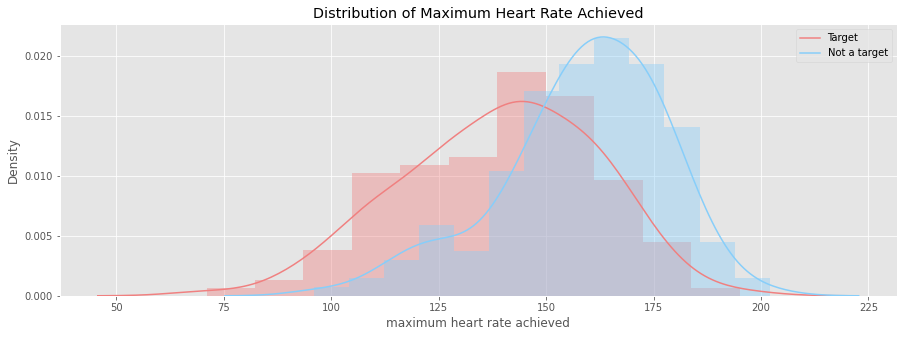

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sbs.distplot(target_df['thalach'], color = 'lightcoral')
sbs.distplot(nontarget_df['thalach'], color = 'lightskyblue')
plt.xlabel('maximum heart rate achieved')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Density')
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.show()

The graph shows the red targeted bell curve to the left of the non targeted one. The difference in their peaks is roughly 15bpm, which is a significant difference. This clearly indicates those that deal with heart disease cannot achieve as high a heart rate as those that are free of it.

Now, we repeated the process for the rest of the factors.

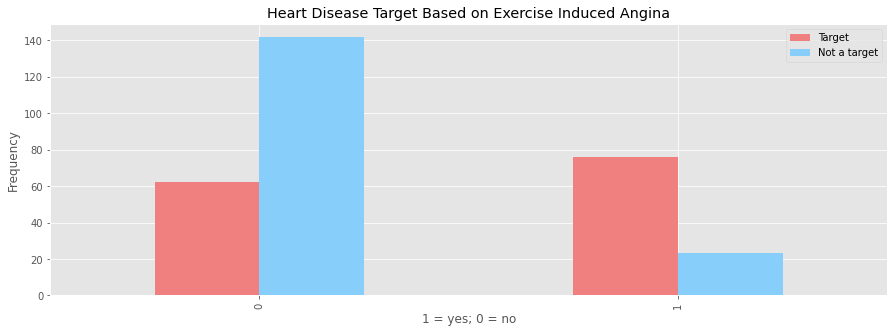

In [ ]:
pd.crosstab(df['exang'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on Exercise Induced Angina')
plt.xlabel('1 = yes; 0 = no')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

Looking at those that don't experience angina, a statistical majority don't have heart disease. On the other hand, the vast majority of people that experience anigina also suffer heart disease. This shows that angina is an indicator of heart disease.

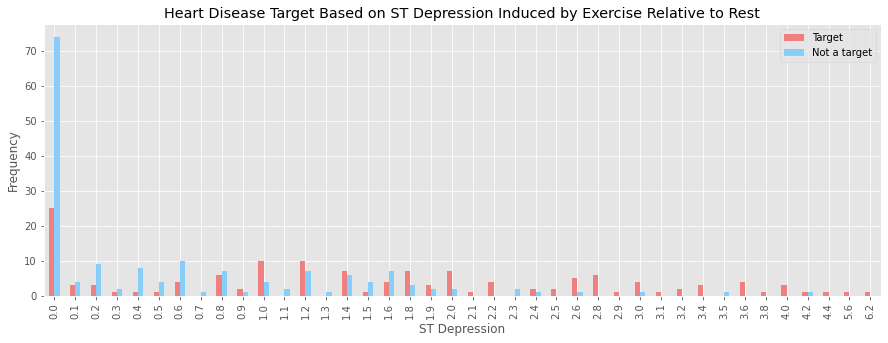

In [ ]:
pd.crosstab(df['oldpeak'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on ST Depression Induced by Exercise Relative to Rest')
plt.xlabel('ST Depression')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

Looking at the low ST depression values (ie. 0.0-0.8), the majority of individuals are healthy of heart disease. However, at 0.9 and beyond, the targeted individuals outnumber healthy ones. Therefore, having a high value ST depression strongly suggests heart disease.

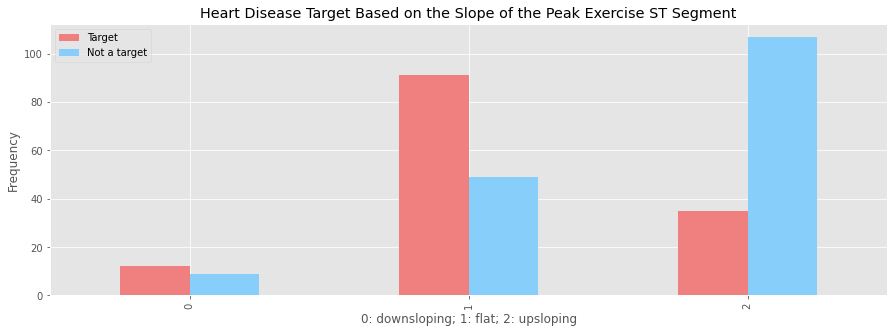

In [ ]:
pd.crosstab(df['slope'],df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on the Slope of the Peak Exercise ST Segment')
plt.xlabel('0: downsloping; 1: flat; 2: upsloping')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

Looking at the slope of the ST depression is helpful for deducing whether one has heart disease or not. If the segment is downsloping or flat, there is a high chance that they are targeted, while it is significantly less likely they are targeted if it is upsloping.

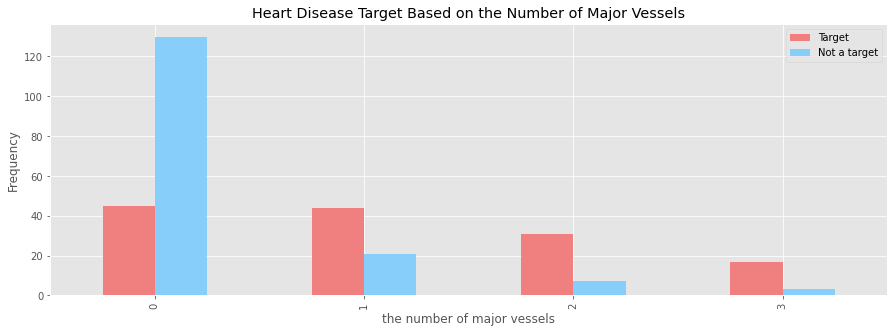

In [ ]:
ca_df = df[df.ca != 4 ]
pd.crosstab(ca_df['ca'],ca_df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on the Number of Major Vessels')
plt.xlabel('the number of major vessels')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

The graph here strongly suggest that those with 0 major vessels are healthy; only a fraction are targeted. On the other hand, the percentage of targeted individuals increases as the number of vessels increases as well, until the point that only a tiny percentage of individuals with 3 major vessels are healthy.

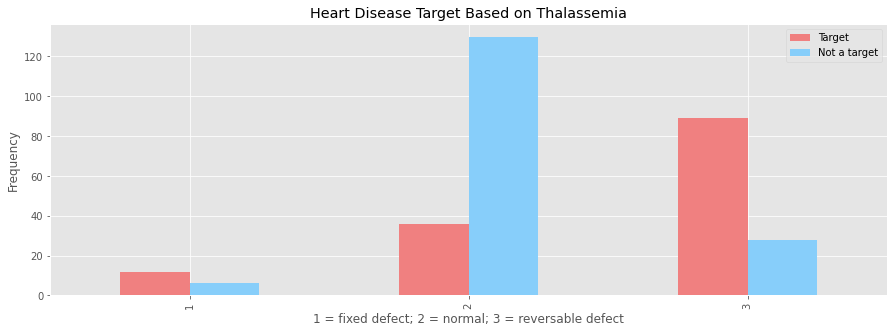

In [ ]:
thal_df = df[df.thal != 0 ]
pd.crosstab(thal_df['thal'],thal_df['target']).plot(kind = 'bar', figsize = (15,5), color = ['lightcoral','lightskyblue'])
plt.title('Heart Disease Target Based on Thalassemia')
plt.xlabel('1 = fixed defect; 2 = normal; 3 = reversable defect')
plt.legend(['Target', 'Not a target'])
plt.ylabel('Frequency')
plt.show()

Regardless of what form of thalassemia suffers from, the data clearly shows that it is likely to also suffer from heart disease. Only a minority of non-thalassemia individuals are targeted.

###Section 4: Findings

Through our analysis of the data, we are confident in our conclusions we will present here. There are several factors that can indicate a patient suffers from heart disease. The more of these criteria that are met, the more likely it is. The criteria are as follows: angina, high blood pressure, high cholesterol, ventrical hypertrophy, abnormality in ST-T wave on the ECG, low maximum heart rate, high ST depression on the ECG (especially if there is a downward or flat slope), high amount of major vessels and thalassemia. Of these, the most indicative are the high cholesterol, low maximum heartrate, and heart abnormalities (ventrical hypertrophy and ST-T wave abnormalities). Furthurmore, it is notable that males and people above 50 years old are more likely to have heart disease.